In [5]:
%pylab inline
import pandas as pd
import seaborn as sns
import os
import glob
sns.set_context('paper', font_scale=3)
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
1638303 2158167 3360636 4762350 5325494 6255630 7579013 8422358 9022937 0684907

In [35]:
tool_colors = {'ribocop': '#66c2a5',
          'ribocode': '#fc8d62',
          'riborf': '#8da0cb',
          'orfrater': '#e78ac3',
          'rpbp': '#a6d854',
          'ribowave': '#ffd92f'}
tool_colors = {'ribocop': '#e41a1c',
          'ribocode': '#377eb8',
          'riborf': '#4daf4a',
          'orfrater': '#984ea3',
          'rpbp': '#ff7f00',
          'ribowave': '#ffff33'}


In [3]:
sheet_name = 'mm10'
excel_df = pd.read_excel('../../ribocop-results/data/datasets_info.xlsx', sheet_name=sheet_name)
excel_df

,GEO,SRA,RIBO sample,RNA sample,read lengths,offsets,RIBO adapter,RNA adapter,RIBO strandedness,RNA strandedness
0,GSE22001,SRP003554,SRX026871,SRX026872,"28,29,30","12,12,12",TCGTATG,TCGTATG,forward,forward
1,GSE72064,SRP062407,SRX1149649,SRX1149668,"28,29,30,31","12,12,12,12",TGGAATTCTCGGGTGCCAAGG,TGGAATTCTCGGGTGCCAAGG,forward,forward
2,GSE84112,SRP078005,SRX1900396,SRX1900402,"26,27,28,29,30","12,12,12,12,12",TGGAATTCTCGGGTGCCAAGG,TGGAATTCTCGGGTGCCAAGG,forward,forward
3,GSE89011,SRP091889,SRX2255510,SRX2255511,"26,27,28,29,30","12,12,12,12,12",AGATCGGAAGAGCACACGTCT,AGATCGGAAGAGCACACGTCT,forward,forward
4,GSE102890,SRP115915,SRX3110803,SRX3110807,"29,30,31,32,33,34","12,12,12,13,13,13",TGGAATTCTCGGGTGCCAAGG,TGGAATTCTCGGGTGCCAAGG,forward,forward
5,GSE99787,SRP108787,SRX2893684,SRX2893692,"25,26,27,28","12,10,11,12",None,None,forward,reverse


In [13]:
def get_runtime(filename):
    df = pd.read_table(filename)
    return df['s'].tolist()[0]

In [36]:
input_dir_root = '/home/cmb-panasas2/wenzhenl/benchmark/gene_level/mm10/'
output_dir_root = '/staging/as/skchoudh/benchmark/gene_level/mm10/'
run_times = []
benchmarks = {'riborf': 'time_benchmarks/riboORF_benchmark/run_ribORF/', # 'RNA.txt'
             'rpbp': 'rpbp_results/time_benchmarks/rpbp/run_rpbp', #'RNA_CCDS_lengths.txt'
             'ribowave': 'time_benchmarks/Ribowave/ribowave/', # 'RNA_CCDS_lengths.txt'
              'ribocop': 'time_benchmarks/ribocop/predict_orfs/', # 'RNA_CCDS_lengths.txt'
             }

for index, row in excel_df.iterrows():
    srp = row['SRA']
    input_dir = os.path.join(input_dir_root, srp+'_mouse')
    output_dir = os.path.join(output_dir_root, srp+'_mouse')
   
    if not os.path.exists(input_dir):
        continue
    for key, location in benchmarks.items():
        for f in glob.glob(os.path.join(output_dir, location, '*.txt')):
            runtime = get_runtime(f)
            file_type = f.split('/')[-1].replace('_CCDS_lengths', '').replace('.txt', '')
            if runtime < 30:
                continue
            run_times.append([srp+'_mouse', key, file_type, runtime])
                           
        
    


In [37]:
df = pd.DataFrame(run_times, columns=['srp', 'tool', 'file_type', 'runtime', ])

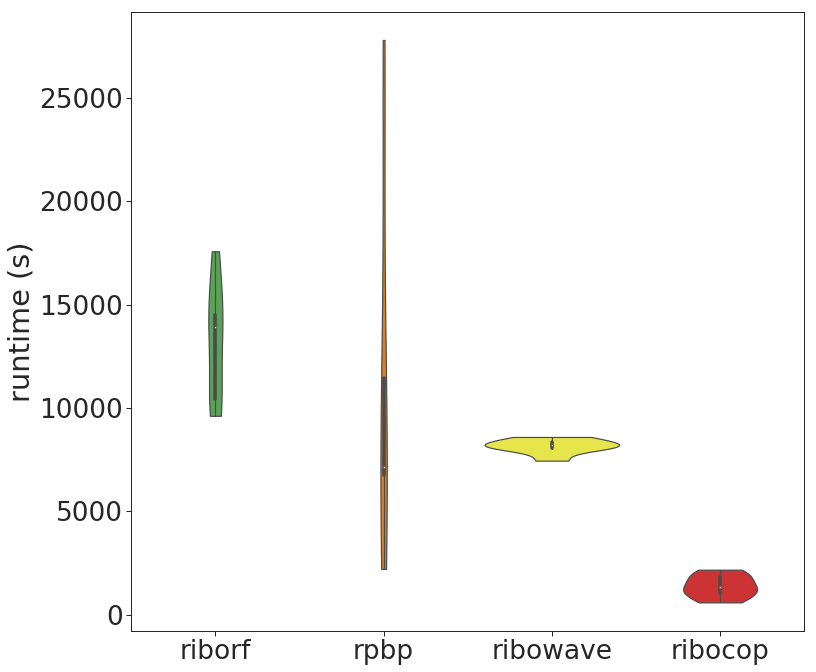

In [65]:
sns.set_context('paper', font_scale=3)
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

fig, ax = plt.subplots(figsize=(12,10))
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

sns.violinplot(data=df, x='tool', y='runtime', palette=tool_colors, ax=ax, legend=False, cut=0)
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

#sns.despine(ax=ax, offset=50, trim=True)
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})
ax.set_ylabel('runtime (s)')
ax.set_xlabel('')
fig.tight_layout()
fig.savefig('../../ribocop-results/notebooks/results/run_time_dist.pdf')

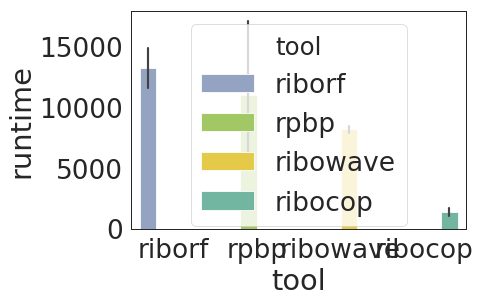

In [33]:
sns.barplot(data=df, x='tool', y='runtime', hue='tool', palette=tool_colors)

In [31]:
colors

<function matplotlib.pyplot.colors()>